In [1]:
import pandas as pd

In [2]:
merged_data = pd.read_csv('merged_data.csv')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108457 entries, 0 to 108456
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    108457 non-null  object 
 1   customer_unique_id             108457 non-null  object 
 2   order_id                       108457 non-null  object 
 3   product_id                     108457 non-null  object 
 4   seller_id                      108457 non-null  object 
 5   price                          108457 non-null  float64
 6   shipping_limit_date            108457 non-null  object 
 7   review_id                      108457 non-null  object 
 8   review_score                   108457 non-null  int64  
 9   order_status                   108457 non-null  object 
 10  order_purchase_timestamp       108457 non-null  object 
 11  order_approved_at              108457 non-null  object 
 12  order_delivered_carrier_date  

In [3]:
# 분석에 사용할 카테고리 및 셀러 등급 정의
target_categories = ['watches_gifts', 'health_beauty', 'bed_bath_table', 'sports_leisure', 'furniture_decor', 'auto', 'fashion_bags_accessories','computers_accessories', 'telephony']
target_grades = ['Diamond', 'Gold', 'Silver', 'Bronze', 'Iron']

# 카테고리 필터링
filtered_df = merged_data[merged_data['category'].isin(target_categories)]
filtered_df

# 평균 계산
grouped = (
    filtered_df
    .groupby(['seller_grade', 'category'])[['product_name_lenght', 'product_description_lenght', 'product_photos_qty']]
    .mean()
    .reset_index()
)

grouped['seller_grade'] = pd.Categorical(grouped['seller_grade'], categories=target_grades, ordered=True)
grouped = grouped.sort_values(['category', 'seller_grade'])

# 결과 출력
grouped

,seller_grade,category,product_name_lenght,product_description_lenght,product_photos_qty
9,Diamond,auto,53.341264,848.064684,2.585130
18,Gold,auto,52.235955,1045.642946,2.478152
36,Silver,auto,49.842105,805.968421,2.292105
0,Bronze,auto,49.173184,669.391061,2.368715
27,Iron,auto,49.272727,800.772727,2.318182
10,Diamond,bed_bath_table,52.099980,431.106672,1.489657
19,Gold,bed_bath_table,49.981343,542.568408,1.483831
37,Silver,bed_bath_table,45.407240,623.443439,1.674208
1,Bronze,bed_bath_table,42.406250,553.812500,1.640625
28,Iron,bed_bath_table,48.181818,442.606061,1.909091


In [4]:
# 이상치 제거 함수 정의
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# 분석 대상 컬럼
detail_columns = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty']

# 이상치 제거
filtered_clean = remove_outliers_iqr(filtered_df.copy(), detail_columns)

# 평균 재계산
grouped_clean = (
    filtered_clean
    .groupby(['seller_grade', 'category'])[detail_columns]
    .mean()
    .reset_index()
)

# 정렬
grouped_clean['seller_grade'] = pd.Categorical(grouped_clean['seller_grade'], categories=target_grades, ordered=True)
grouped_clean = grouped_clean.sort_values(['category', 'seller_grade'])

# 출력
grouped_clean

,seller_grade,category,product_name_lenght,product_description_lenght,product_photos_qty
9,Diamond,auto,53.857491,715.792529,2.553796
18,Gold,auto,51.906110,798.707899,2.172876
36,Silver,auto,50.377976,708.729167,2.130952
0,Bronze,auto,49.240000,638.177143,2.365714
27,Iron,auto,50.048387,742.564516,2.225806
10,Diamond,bed_bath_table,52.004869,387.544240,1.451823
19,Gold,bed_bath_table,49.953887,488.919631,1.349144
37,Silver,bed_bath_table,44.970732,535.868293,1.356098
1,Bronze,bed_bath_table,42.126984,521.396825,1.603175
28,Iron,bed_bath_table,48.181818,442.606061,1.909091


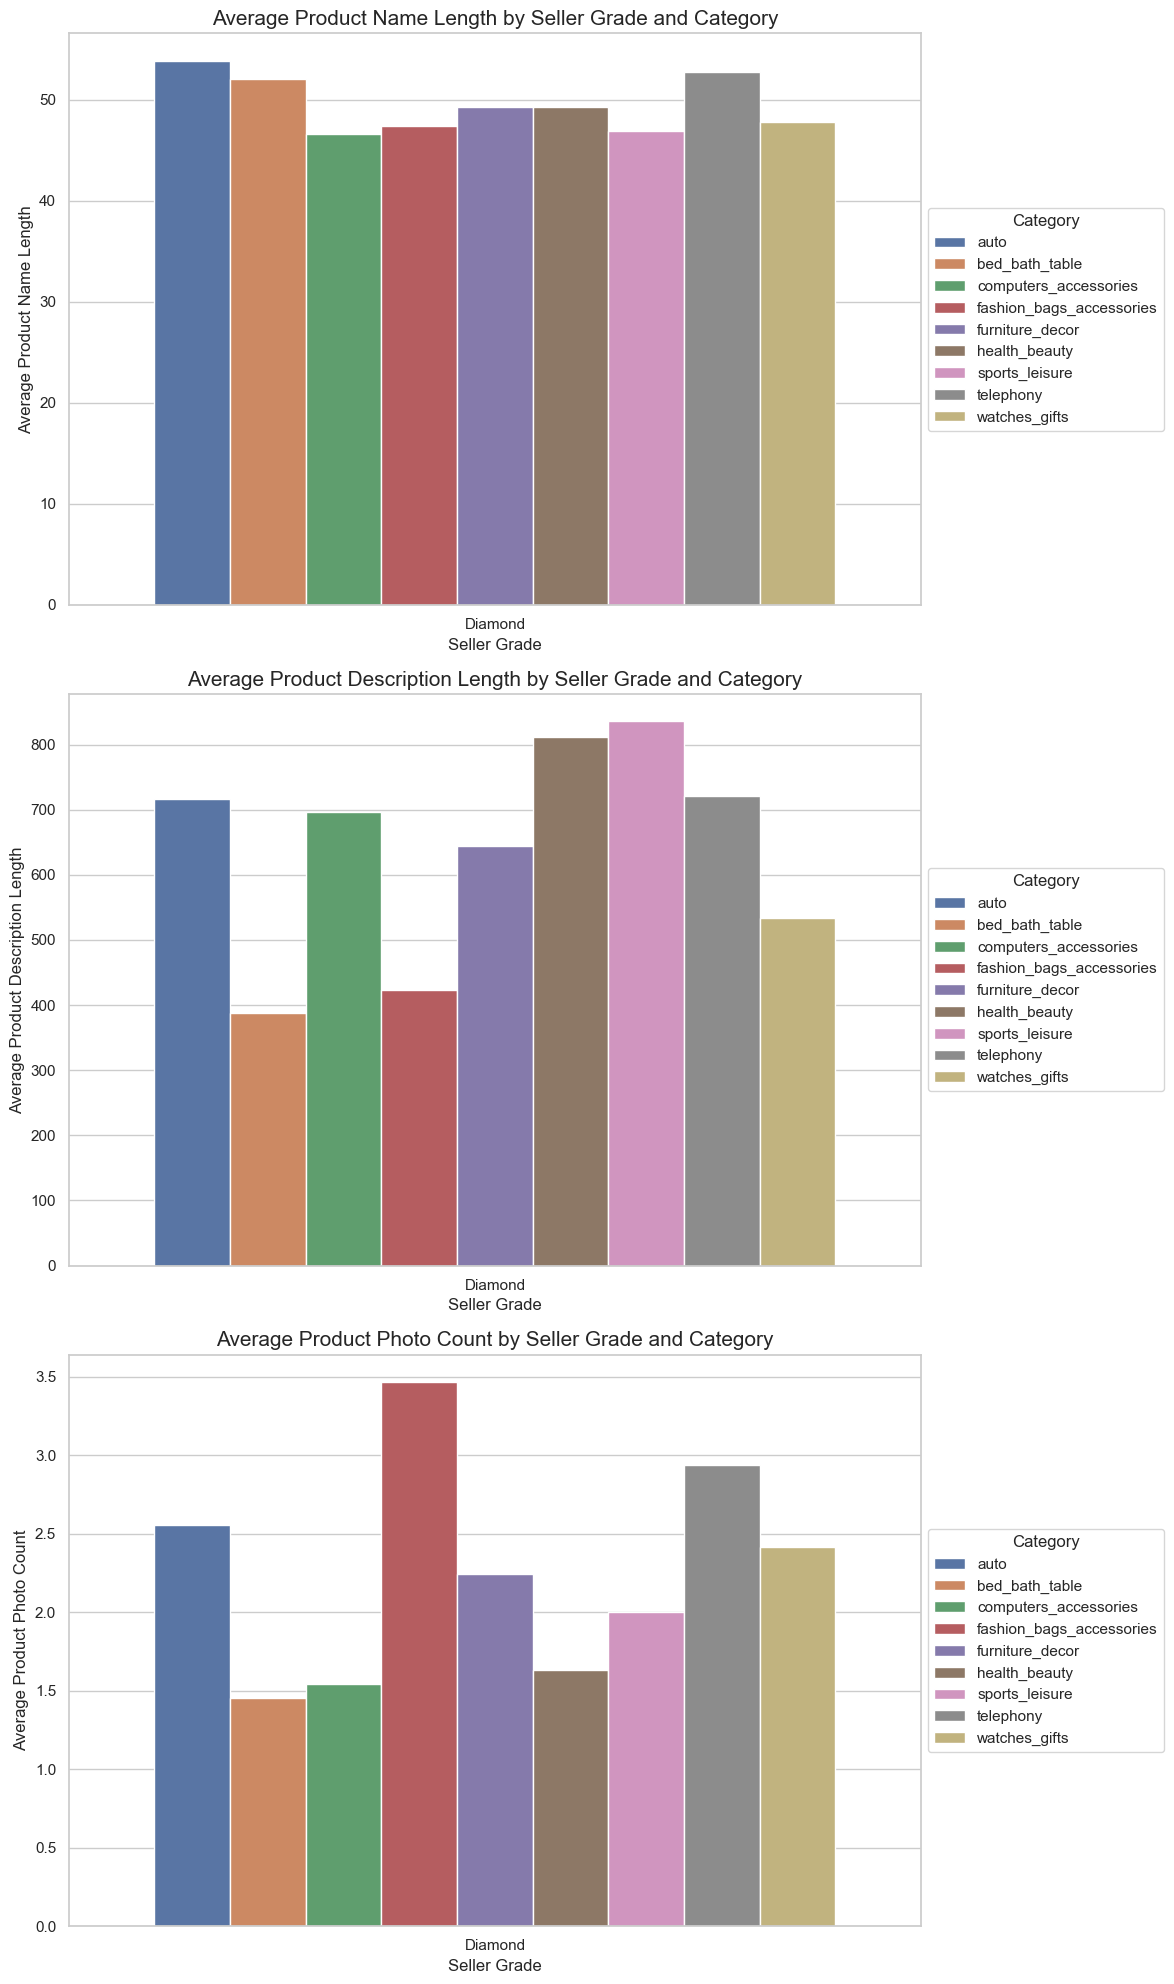

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

target_grades = ['Diamond']

# Set English font (default) and style
plt.rcParams['font.family'] = 'Arial'  # Or remove this line to use system default
plt.rcParams['axes.unicode_minus'] = False

# Target columns and their English labels
metrics = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty']
metric_labels = ['Product Name Length', 'Product Description Length', 'Product Photo Count']

# Seaborn style
sns.set(style='whitegrid')

# Plot layout: 3 rows, 1 column
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 20))

# Plot each metric
for i, (metric, label) in enumerate(zip(metrics, metric_labels)):
    ax = axes[i]
    sns.barplot(
        data=grouped_clean,
        x='seller_grade',
        y=metric,
        hue='category',
        order=target_grades,
        ax=ax
    )
    ax.set_title(f'Average {label} by Seller Grade and Category', fontsize=15)
    ax.set_ylabel(f'Average {label}')
    ax.set_xlabel('Seller Grade')
    ax.legend(title='Category', loc='center left', bbox_to_anchor=(1, 0.5))  # Move legend outside right

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Give space for legend
plt.show()

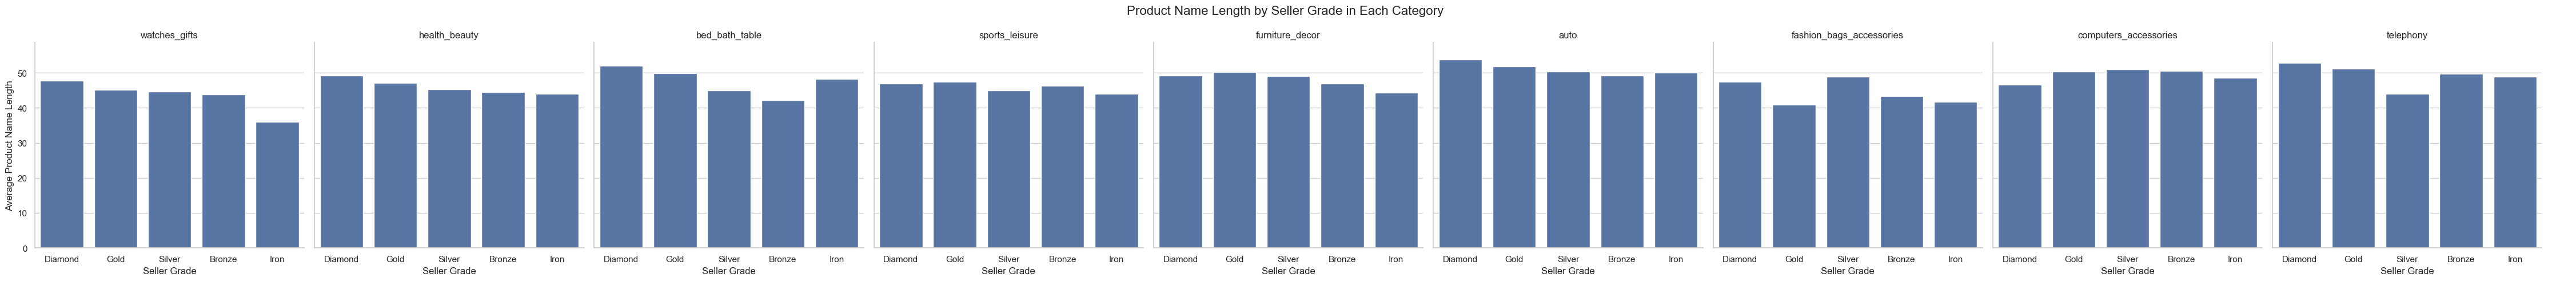

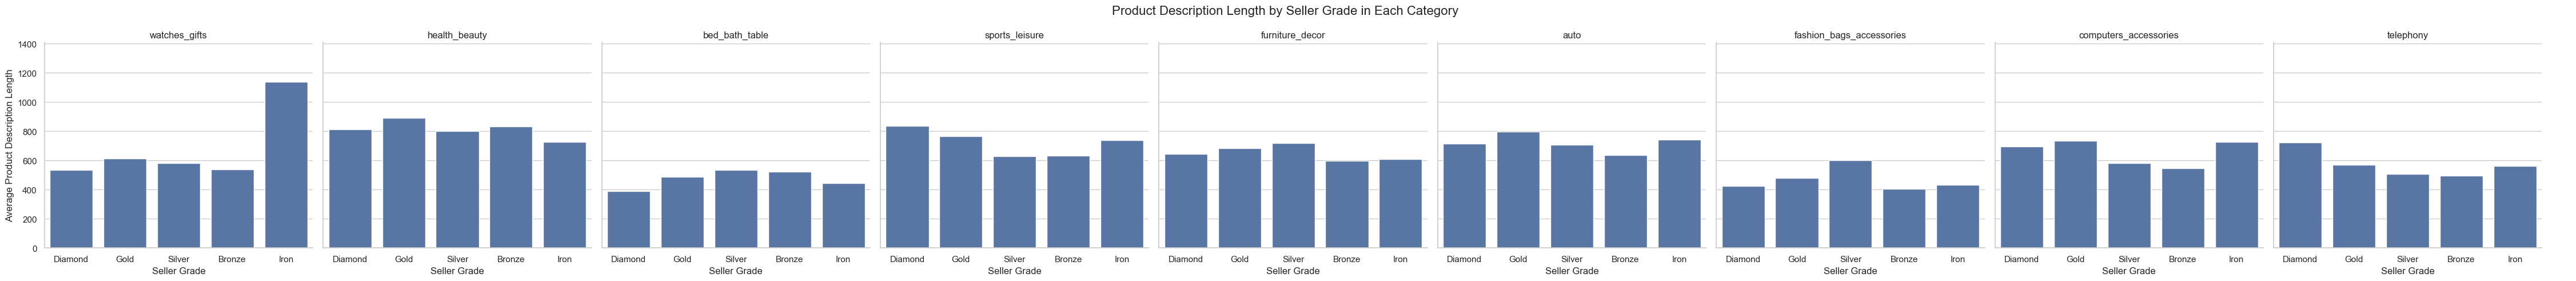

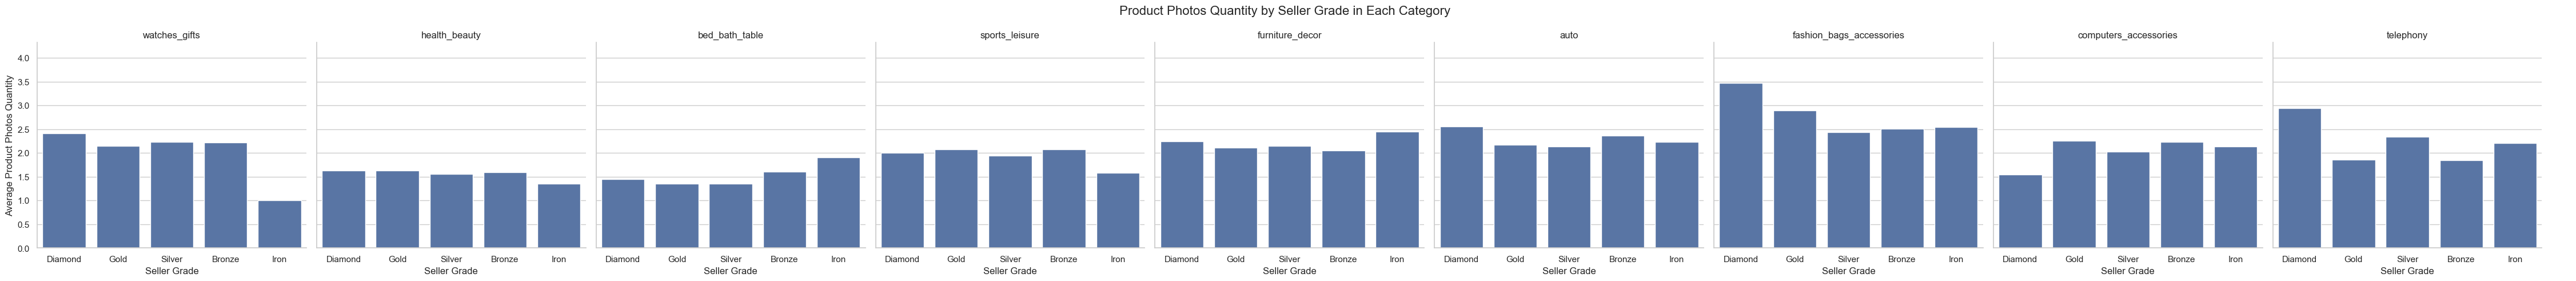

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# 분석 대상 컬럼
metrics = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty']
metric_labels = ['Product Name Length', 'Product Description Length', 'Product Photos Quantity']

# 시각화 스타일 설정
sns.set(style='whitegrid')

# 카테고리별로 반복
for metric, label in zip(metrics, metric_labels):
    g = sns.catplot(
        data=grouped_clean,
        x='seller_grade',
        y=metric,
        col='category',
        kind='bar',
        order=target_grades,
        col_order=target_categories,
        height=5,
        aspect=1
    )
    g.set_titles(col_template='{col_name}')
    g.set_axis_labels("Seller Grade", f'Average {label}')
    g.fig.suptitle(f'{label} by Seller Grade in Each Category', fontsize=16)
    g.set(ylim=(0, grouped[metric].max() * 1.1))
    
    plt.subplots_adjust(top=0.85)
    plt.show()

In [7]:
target_grades = ['Diamond', 'Iron']
detail_columns = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty']

# 카테고리 및 셀러 등급 필터링
filtered_df = merged_data[
    (merged_data['category'].isin(target_categories)) &
    (merged_data['seller_grade'].isin(target_grades))
].copy()

# 이상치 제거 함수
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

# 이상치 제거 적용
filtered_clean = remove_outliers_iqr(filtered_df, detail_columns)

# 평균 계산
comparison = (
    filtered_clean
    .groupby(['category', 'seller_grade'])[detail_columns]
    .mean()
    .round(2)
    .reset_index()
)

# 보기 좋게 피벗 (행: category, 열: seller_grade)
pivoted = comparison.pivot(index='category', columns='seller_grade', values=detail_columns)

# 결과 확인
print(pivoted)

                         product_name_lenght         \
seller_grade                         Diamond   Iron   
category                                              
auto                                   53.87  50.38   
bed_bath_table                         52.01  48.18   
computers_accessories                  45.85  48.52   
fashion_bags_accessories               47.53  41.73   
furniture_decor                        49.27  45.29   
health_beauty                          49.40  43.94   
sports_leisure                         46.94  44.57   
telephony                              52.75  48.90   
watches_gifts                          47.81  36.00   

                         product_description_lenght           \
seller_grade                                Diamond     Iron   
category                                                       
auto                                         715.81   719.72   
bed_bath_table                               387.51   442.61   
computers_accessori

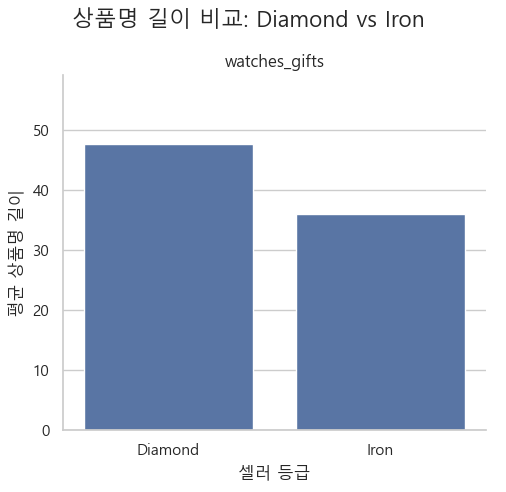

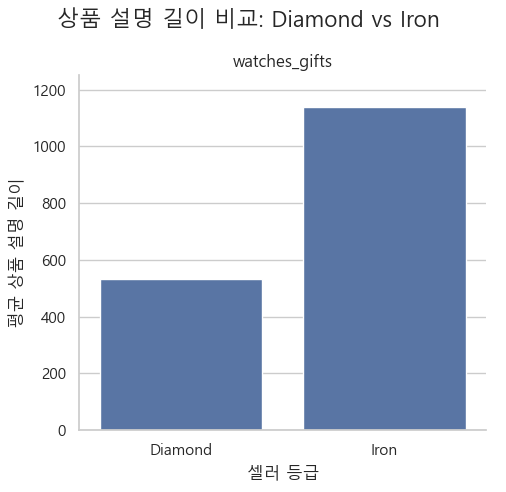

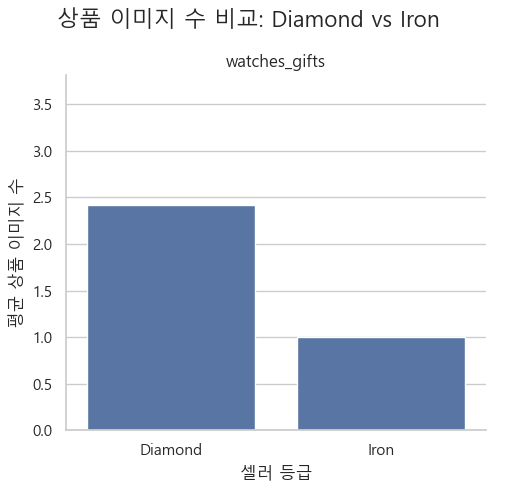

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

target_categories = ['watches_gifts']

# 분석 대상 컬럼
metrics = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty']
metric_labels = ['상품명 길이', '상품 설명 길이', '상품 이미지 수']

# 사용할 셀러 등급 및 카테고리
target_grades = ['Diamond', 'Iron']
filtered_grouped = grouped_clean[grouped_clean['seller_grade'].isin(target_grades)]

# 시각화 스타일 설정
sns.set(style='whitegrid')
plt.rc('font', family = 'Malgun Gothic')
# 카테고리별로 반복
for metric, label in zip(metrics, metric_labels):
    g = sns.catplot(
        data=filtered_grouped,
        x='seller_grade',
        y=metric,
        col='category',
        kind='bar',
        order=target_grades,
        col_order=target_categories,
        height=5,
        aspect=1
    )
    g.set_titles(col_template='{col_name}')
    g.set_axis_labels("셀러 등급", f'평균 {label}')
    g.fig.suptitle(f'{label} 비교: Diamond vs Iron', fontsize=16)
    g.set(ylim=(0, filtered_grouped[metric].max() * 1.1))
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()